## ***REGRESIÓN LINEAL***


![Imagen de Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/350px-Linear_regression.svg.png)



#***Introducción***

Una regrelsión lineal es un algoritmo de aprendizaje que entrena un conjunto de datos buscando la mejor aproximación lineal. Si a puntos ${\bf x}_1, {\bf x}_2, \ldots, {\bf x}_m\in {\bf R}^n$ les corresponden puntos $y_1, y_2,\ldots, y_m\in {\bf R}$ respectivamente, el objetivo de la regresión lineal es encontrar el mejor hiperplano $h({\bf x}) = w_0+{\bf w}^t{\bf x}$ que aproxime  $h({\bf x}_i)\sim y_i$.

#***Breve historia***

El primer intento de aproximar datos por hiperplanos documentado es el método de los mínimos cuadrados debido a Legendre en 1805. Posteriormente, Gauss publicó un trabajo en donde se desarrollaba más el método incluyendo el teorema de Gauss-Markov. Sin embargo, el término regresión fue introducido por Francis Galton en su libro Natural Inheritance (1889), su trabajo se centró en estudiar los rasgos físicos de los decentientes a partir de los rasgos de sus padres.

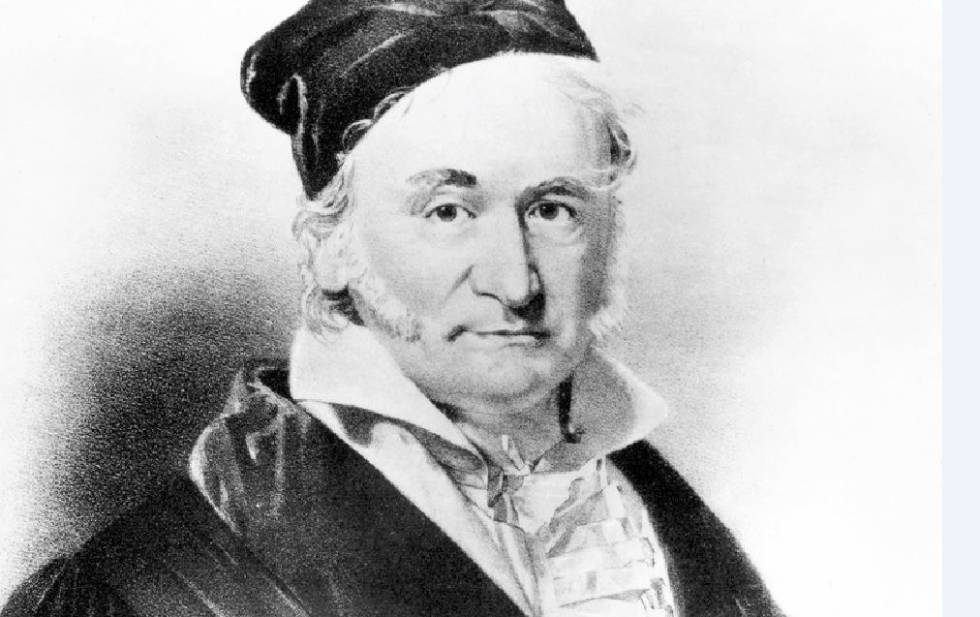



#***Planteamiento del algoritmo***




Si hacemos $$X=\left(\begin{array}{c}{\bf x}_1\\ \vdots\\ {\bf x}_m\end{array}\right),\, \,  y=\left(\begin{array}{c} y_1\\ \vdots\\ y_m\end{array}\right), $$ y a $X$ se le añade una columna de unos, se pueden obtener los parámetros óptimos $w=(w_0, w_1,\ldots, w_m)^t$ directamente de la ecuación $w = (X^t X)^{-1}X^ty$, método de mínimos cuadrados. Un método así es eficiente para conjuntos pequeños de datos; pero para un conjunto grande da datos; el algorítmo de gradiente decentente es más eficiente. La función de pérdida, $$j(w) = {1\over m}\|Xw-y\|^2 $$ es una medida de la distancia entre $h_w({\bf x}_i)$ y $y_i$ para cada para cada $w$, esta es una «parábola» en varias dimensiones en cuyo vértice se encuentra el $w$ que minimiza la distancia. Puesto que $j$ es diferenciable,  su gradiente apunta a la dirección en que la función crece,  el gradiente decendente i moverse en un paso en dirección opuesta al gradiente para acercarse al mínimo, formalmente

$$w_{n+1,j} = w_{n,j}-\alpha {\partial j(w)\over \partial w_j}$$

El $\alpha$, se llama coeficiente de aprendizaje, y mide la velocidad con que el algoritmo puede converger.

# ***Ejemplo***

In [16]:

#Se importan algunas librerías.

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [17]:
#Importamos los datos de la misma librería de scikit-learn. Esta librería cuenta con algunos conjuntos de datos para ensayar.

boston = datasets.load_boston()

In [18]:
#Se verifica la información del conjunto de datos.

print('Información en el conjunto de datos:')
print(boston.keys())

Información en el conjunto de datos:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [19]:
#Se verifican las características del conjunto de datos (variables independientes.)

print('Características del conjunto de datos:')
print(boston.DESCR)

Características del conjunto de datos:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax

In [20]:
#Se verifica la cantidad de datos.

print('Cantidad de datos:')
print(boston.data.shape)

Cantidad de datos:
(506, 13)


In [21]:
#Se verifican los nombres de las columnas.

print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [22]:
#Seleccionamos solamente la columna 4 del conjunto de datos (DIS: Distancia a los centros de trabajo.)

X = boston.data[:, np.newaxis, 7]

In [23]:
#Defino la variable dependiente y.

y = boston.target

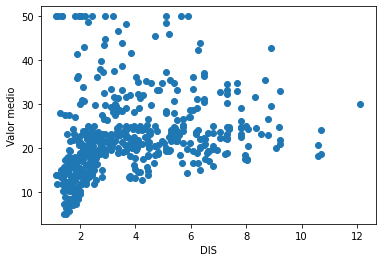

In [24]:
#Graficamos los datos de la regresión lineal simple.

plt.scatter(X, y)
plt.xlabel('DIS')
plt.ylabel('Valor medio')
plt.show()

In [25]:
#Se definen los conjuntos de entrenamiento y testeo. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
#Defino el algoritmo a utilizar; en este caso, regresión lineal.

lr = linear_model.LinearRegression()

In [27]:
#Entrenamos el modelo.

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Entrenamos el el conjunto de test para hacer una predicción.

Y_pred = lr.predict(X_test)

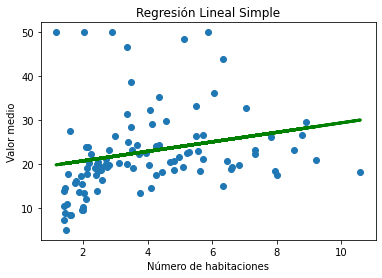

In [29]:
#Hacemos una gráfica del conjunto de datos junto al modelo que hemos obtenido.

plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='green', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

##***Conclusiones***



1.   Muchas veces el algoritmo de regresión lineal, no es un buen modelo para los datos. Sobre todo en casos donde los datos están muy dispersos, se requiere muchísimos datos para saber sí un modelo lineal es una función que ajusta bien los datos.

2.   El método de mínimos cuadrados, es buena elección si el conjunto es pequeño, pero pienso que en este caso podría no servir para hacer predicciones.



# ***Enlaces de referencia***


[Wikipedia en Español](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

[Wikipedia en Inglés](Linear_regression)

[Helber Arturo Lozano](https://prezi.com/qpxysldecq4u/regresion-lineal/)

[Regresión Lineal Simple – Práctica con Python](https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/)
